# WELCOME TO THE NOTEBOOK
---

Importing Modules

In [1]:
import pandas as pd 

Loading the data

In [2]:
df = pd.read_json('movies_dataset.json')
df.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


Check the dataframe shape (#rows and #columns)

In [3]:
df.shape

(5043, 14)

Let's check the data types of the columns

In [4]:
df.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [5]:
df.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'star_name', 'movie_title', 'movie_imdb_link', 'language',
       'country', 'budget', 'title_year', 'imdb_score'],
      dtype='object')

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [6]:
df.drop(columns=['movie_imdb_link', 'num_critic_for_reviews', 'genres'], inplace = True)
df.head()

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,7.1


Let's check the shape again

In [7]:
df.shape

(5043, 11)

Let's convert the dtype of `title_year` column to integer

In [8]:
df['title_year'] = df['title_year'].astype('Int64')

Let's check the dataframe again

In [9]:
df.dtypes

color             object
director_name     object
duration         float64
gross            float64
star_name         object
movie_title       object
language          object
country           object
budget           float64
title_year         Int64
imdb_score       float64
dtype: object

Renaming some columns: 
- changing `gross` to `movie_income`

In [10]:
df.rename(columns={'gross':'movie_income'}, inplace= True)

Exercise: Rename the `budget` column to `movie_budget`

In [11]:
df.rename(columns={'budget':'movie_budget'}, inplace= True)

---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


Text(0, 0.5, 'Count')

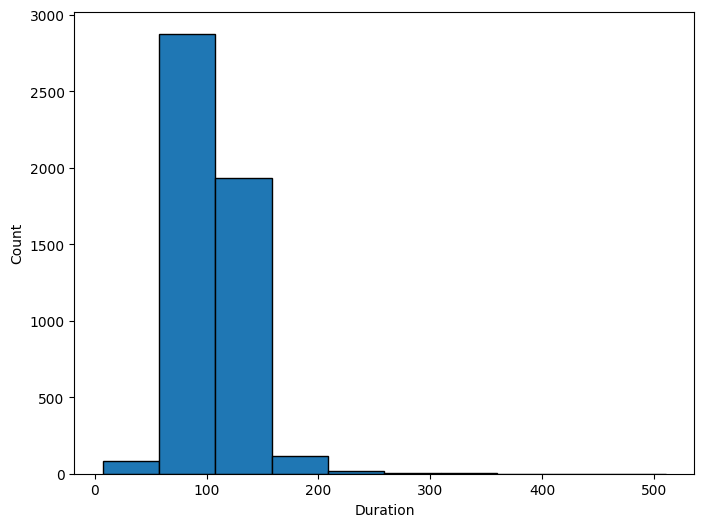

In [28]:
ax = df.duration.hist(figsize=(8,6), edgecolor='black', grid=False)
ax.set_xlabel('Duration')
ax.set_ylabel('Count')

Exercise: Create a hitogram to see the distribution of `imdb_score` column

Text(0, 0.5, 'Count')

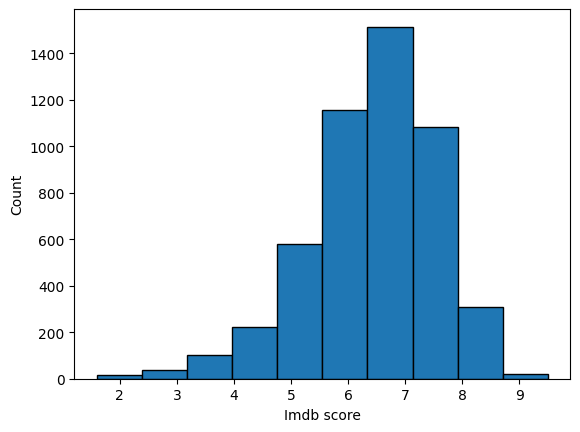

In [13]:
ax = df['imdb_score'].hist(edgecolor='black', grid=False)
ax.set_xlabel('Imdb score')
ax.set_ylabel('Count')

Let's check how many movies have the `imdb_score` less than `4`.

In [14]:
low_score = df[df['imdb_score'] < 4]

In [15]:
low_score['movie_title'].count()

156

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

Text(0, 0.5, 'Count')

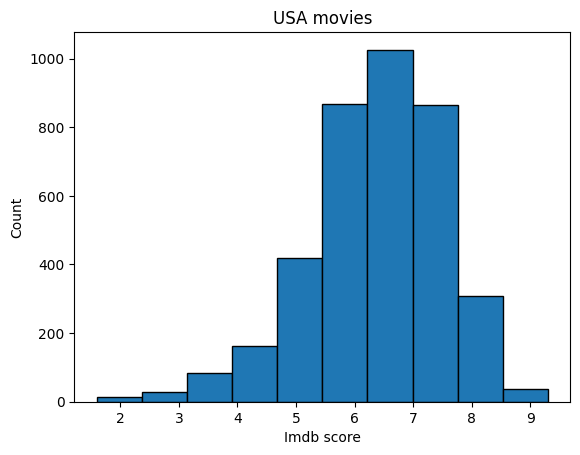

In [16]:
usa_movies = df[df['country'] == 'USA']
ax = usa_movies['imdb_score'].hist(edgecolor='black', grid=False)
ax.set_title('USA movies')
ax.set_xlabel('Imdb score')
ax.set_ylabel('Count')


---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [17]:
movies_per_year = df.groupby('title_year').size()
movies_per_year.idxmax() #2009
movies_per_year.idxmin() #1916

1916

Let's create a line chart to show the result

Text(0, 0.5, 'Count')

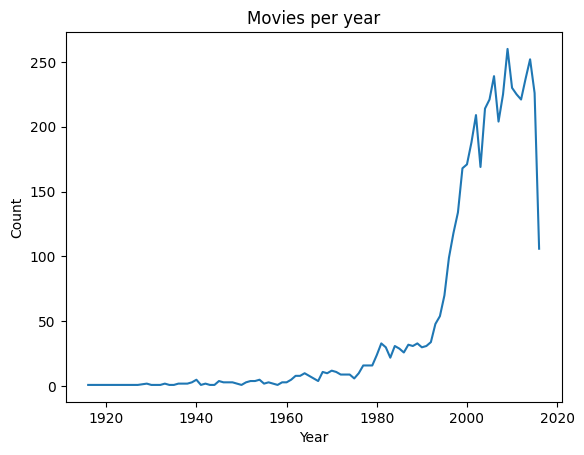

In [18]:
ax = movies_per_year.plot.line()
ax.set_title('Movies per year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [19]:
imdb_per_year = df.groupby('title_year')['imdb_score'].mean()
imdb_per_year.idxmax() #1957
imdb_per_year.idxmin() #1920

1920

Let's Use a barchart to visualize the result

Text(0, 0.5, 'Imdb score')

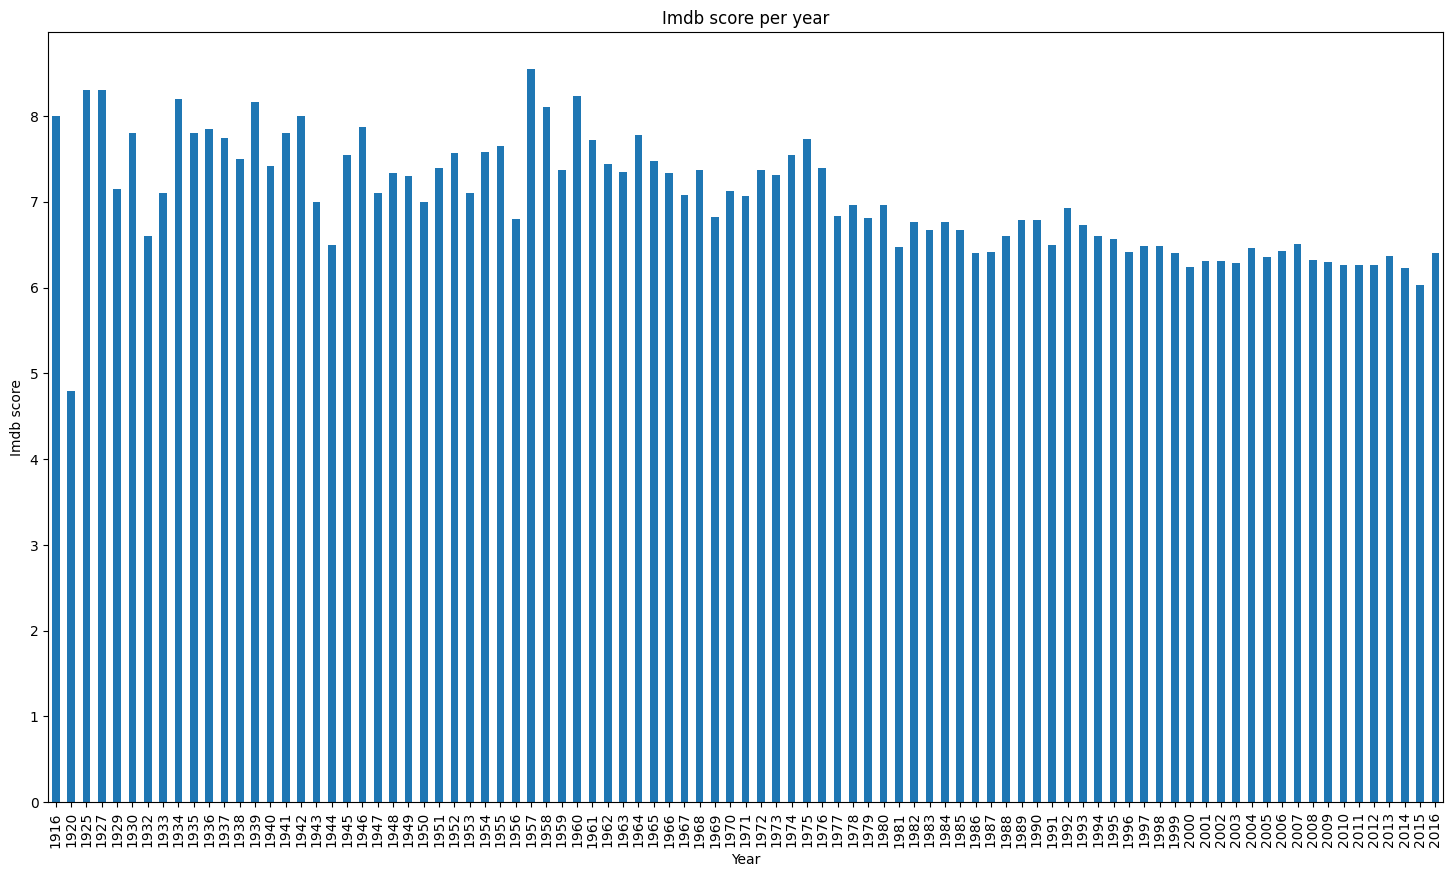

In [20]:
ax = imdb_per_year.plot.bar(figsize=(18,10))
ax.set_title('Imdb score per year')
ax.set_xlabel('Year')
ax.set_ylabel('Imdb score')

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

In [21]:
budget_per_year = df.groupby('title_year')['movie_budget'].sum()
budget_per_year.idxmax() #2006
budget_per_year.idxmin() #1920

1920

Text(0, 0.5, 'Budget')

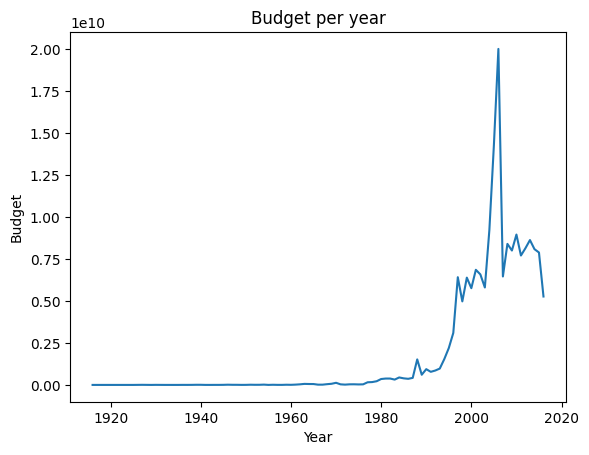

In [22]:
ax = budget_per_year.plot.line()
ax.set_title('Budget per year')
ax.set_xlabel('Year')
ax.set_ylabel('Budget')

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [23]:
df2 = df[['movie_income','imdb_score']]
df2.shape

(5043, 2)

Let's drop the rows with `non` values

In [24]:
df2.dropna(inplace=True)
df2.shape

C:\Users\jfili\AppData\Local\Temp\ipykernel_22368\3446334094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


(4159, 2)

Let's create a scatter plot to see the data

Text(0.5, 1.0, 'Correlation between movie income vs Imdb score')

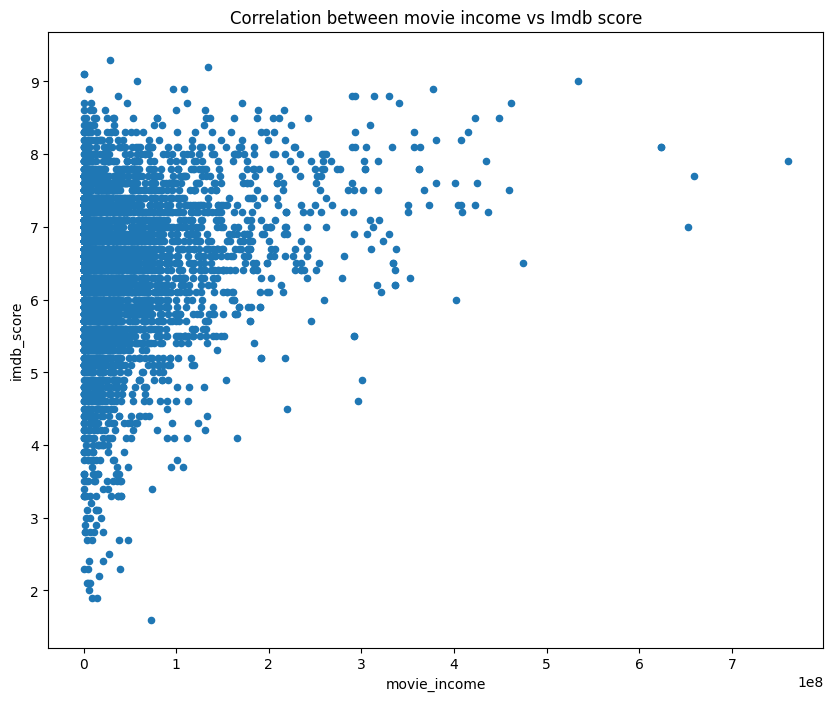

In [25]:
ax = df2.plot.scatter(x='movie_income', y='imdb_score', figsize = (10,8))
ax.set_title('Correlation between movie income vs Imdb score')

Let's generate the correlation matrix

In [26]:
df2.corr()

,movie_income,imdb_score
movie_income,1.000000,0.198021
imdb_score,0.198021,1.000000


In [27]:
#The correlation value is close to zero, which means there is a slight but positive relationship between a film's budget and its IMDb score.
# As the budget increases, the IMDb score tends to increase slightly, but the effect is not strong.